# Descriptive (Spatial) Analytics

Analyze taxi demand patterns for the relevant one-year period and 
city (please check carefully which year your team has been allocated). 

Specifically show how these
patterns (start time, trip length, start and end location, price, average idle time between trips, and so 
on) for the given sample varies in different spatio-temporal resolution (i.e., census tract vs. varying
hexagon diameter and/or temporal bin sizes). 

Give possible reasons for the observed patterns.

Notes:
- Where do the most rides start/end in?
- Which combinations of start -> end are most frequent?
    - in which time periods 

- The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips. This column often will be blank for locations outside Chicago.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import descriptive as desc

In [21]:
#import dataset
df = pd.read_csv("./data/datasets/df_chicago.csv.zip") ## df_chicago
df["Trip_Minutes"] = np.floor(df["Trip_Seconds"] / 60)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8974520 entries, 0 to 8974519
Data columns (total 45 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Trip_ID                        object 
 1   Taxi_ID                        object 
 2   Trip_Start_Timestamp           object 
 3   Trip_End_Timestamp             object 
 4   Trip_Seconds                   float64
 5   Trip_Miles                     float64
 6   Pickup_Census_Tract            float64
 7   Dropoff_Census_Tract           float64
 8   Pickup_Community_Area          float64
 9   Dropoff_Community_Area         float64
 10  Fare                           float64
 11  Tips                           float64
 12  Tolls                          float64
 13  Extras                         float64
 14  Payment_Type                   object 
 15  Pickup_Centroid_Latitude       float64
 16  Pickup_Centroid_Longitude      float64
 17  Pickup_Centroid_Location       object 
 18  Dr

## Start and end location

### Census tract

In [51]:
df["Pickup_C->Dropoff_C"] = df["Pickup_Census_Tract"].astype(str)+"->"+df["Dropoff_Census_Tract"].astype(str)

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,humidity,temperature_celsius,wind_direction,wind_speed,description,h3_hex_id_high_res,h3_hex_id_medium_res,h3_hex_id_low_res,Trip_Minutes,Pickup_C->Dropoff_C
0,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01 00:00:00,2013-01-01 00:00:00,900.0,2.7,NaN,NaN,28.0,8.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664ca91fffff,872664ca9ffffff,862664cafffffff,15.0,nan->nan
1,9a9d9902dfa267b88400a22a2c9f0cf74384b372,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-01-01 00:00:00,2013-01-01 00:00:00,240.0,0.4,1.703107e+10,1.703107e+10,7.0,7.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664c12bfffff,872664c12ffffff,862664c17ffffff,4.0,17031070400.0->17031070300.0
2,5e07d8d10a2314fb71214c71ca3f19beab79652d,0826a2682f598bf0e39aa460479bc87757bd2fcb72c171...,2013-01-01 00:00:00,2013-01-01 00:00:00,1920.0,0.6,1.703122e+10,1.703104e+10,22.0,4.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664ca11fffff,872664ca1ffffff,862664ca7ffffff,32.0,17031221300.0->17031040600.0
3,6deda34a1a498737aaa64734fa2c09a0bf335f18,48c42d95f8331cbfbcab8a6d5299dbb654a041f3c2efff...,2013-01-01 00:00:00,2013-01-01 00:00:00,180.0,1.0,NaN,NaN,24.0,24.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664cac3fffff,872664cacffffff,862664cafffffff,3.0,nan->nan
4,faa2c909d0b88f3f54217135c6919a7fdd73a366,2e75c09511f6a1e2dee45f65888243ab9093f6c1558f10...,2013-01-01 00:00:00,2013-01-01 00:00:00,240.0,0.3,1.703128e+10,1.703132e+10,28.0,32.0,...,64.0,-0.19,200.0,4.0,overcast clouds,882664c1adfffff,872664c1affffff,862664c1fffffff,4.0,17031281900.0->17031320400.0


In [52]:
#How many rides start per district
grouped = df[["Pickup_Census_Tract", "Trip_Minutes"]].groupby("Pickup_Census_Tract").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
Pickup_Census_Tract,
1.703128e+10,280532
1.703108e+10,363559
1.703108e+10,382655
1.703132e+10,485983
1.703184e+10,814316


In [53]:
#How many rides end per district
grouped = df[["Dropoff_Census_Tract", "Trip_Minutes"]].groupby("Dropoff_Census_Tract").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
Dropoff_Census_Tract,
1.703128e+10,283616
1.703108e+10,286083
1.703108e+10,309481
1.703132e+10,410732
1.703184e+10,741576


In [54]:
#How many rides start per district
grouped = df[["Pickup_C->Dropoff_C", "Trip_Minutes"]].groupby("Pickup_C->Dropoff_C").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
Pickup_C->Dropoff_C,
17031081500.0->17031839100.0,60865
17031839100.0->17031320100.0,61548
17031839100.0->17031839100.0,77024
17031320100.0->17031839100.0,77573
nan->nan,2621863


### Diff temporal bin sizes

Hour, Day, Week, Month

#### Hour bin size

<Axes: xlabel='start_time_hourly', ylabel='Count'>

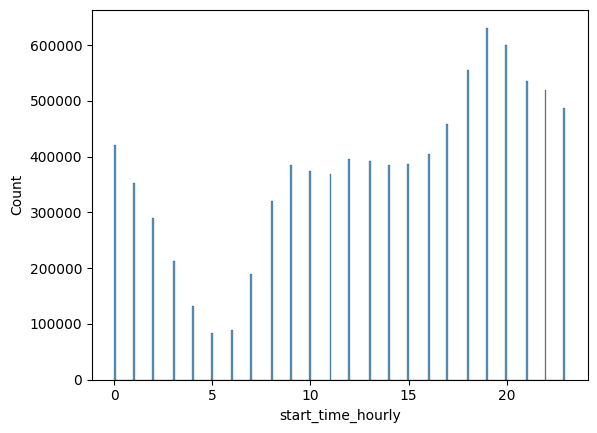

In [55]:
sns.histplot(df["start_time_hourly"])

In [56]:
#How many rides start per district
grouped = df[["Pickup_Census_Tract", "start_time_hourly", "Trip_Minutes"]].groupby(["Pickup_Census_Tract", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Pickup_Census_Tract start_time_hourly       
1.703184e+10        16                 59048
                    20                 61118
                    17                 69155
                    19                 76536
                    18                 77026

In [57]:
#How many rides end per district
grouped = df[["Dropoff_Census_Tract", "start_time_hourly", "Trip_Minutes"]].groupby(["Dropoff_Census_Tract", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Dropoff_Census_Tract start_time_hourly       
1.703184e+10         11                 48422
                     13                 50064
                     10                 66452
                     8                  81307
                     9                  91961

In [58]:
#How many rides start-end combination 
grouped = df[["Pickup_C->Dropoff_C", "start_time_hourly", "Trip_Minutes"]].groupby(["Pickup_C->Dropoff_C", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Pickup_C->Dropoff_C start_time_hourly        
nan->nan            20                 139997
                    21                 142222
                    19                 142648
                    23                 143718
                    22                 146346

#### Day Bin size

<Axes: xlabel='Day_Ordered', ylabel='Count'>

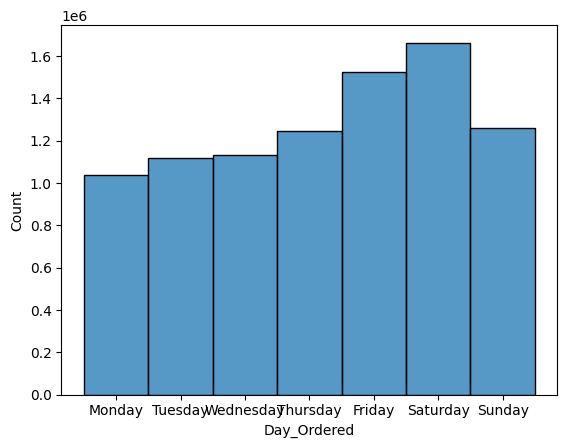

In [79]:
#How many rides per day
df['Day_Ordered'] = pd.Categorical(df['dayOfWeek'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.histplot(df["Day_Ordered"])

In [60]:
#How many rides start per district
grouped = df[["dayOfWeek", "Trip_Minutes"]].groupby("dayOfWeek").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
dayOfWeek,
Wednesday,1131020
Thursday,1244321
Sunday,1258763
Friday,1522147
Saturday,1663204


In [61]:
#How many rides start per district
grouped = df[["Pickup_Census_Tract", "dayOfWeek", "Trip_Minutes"]].groupby(["Pickup_Census_Tract", "dayOfWeek"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Pickup_Census_Tract dayOfWeek        
1.703184e+10        Monday     120791
                    Tuesday    144136
                    Wednesday  147758
                    Friday     148850
                    Thursday   151455

In [62]:
#How many rides end per district
grouped = df[["Dropoff_Census_Tract", "dayOfWeek", "Trip_Minutes"]].groupby(["Dropoff_Census_Tract", "dayOfWeek"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Dropoff_Census_Tract dayOfWeek        
1.703184e+10         Monday     110901
                     Tuesday    130366
                     Friday     133871
                     Wednesday  134280
                     Thursday   138618

In [63]:
#How many rides start-end combination 
grouped = df[["Pickup_C->Dropoff_C", "dayOfWeek", "Trip_Minutes"]].groupby(["Pickup_C->Dropoff_C", "dayOfWeek"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Pickup_C->Dropoff_C dayOfWeek        
nan->nan            Monday     348756
                    Thursday   355218
                    Friday     400381
                    Sunday     412968
                    Saturday   434691

#### Week bin size

<Axes: xlabel='start_time_week', ylabel='Count'>

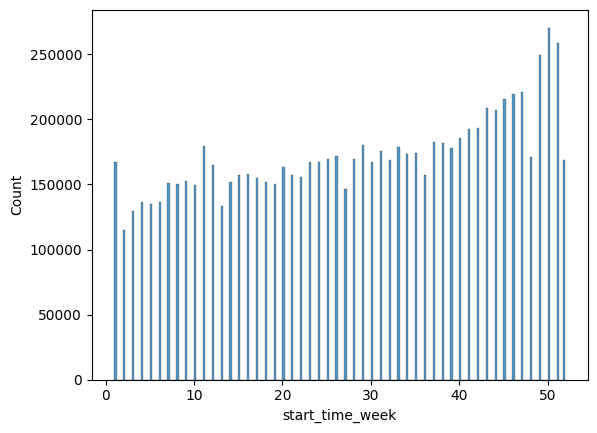

In [64]:
sns.histplot(df["start_time_week"])

In [65]:
#How many rides start per district
grouped = df[["start_time_week", "Trip_Minutes"]].groupby("start_time_week").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
start_time_week,
46,219786
47,220916
49,249387
51,258418
50,270631


In [66]:
#How many rides start per district
grouped = df[["Pickup_Census_Tract", "start_time_week", "Trip_Minutes"]].groupby(["Pickup_Census_Tract", "start_time_week"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Pickup_Census_Tract start_time_week       
1.703184e+10        45               20749
                    47               21437
                    49               24100
                    50               26586
                    51               26867

In [67]:
#How many rides end per district
grouped = df[["Dropoff_Census_Tract", "start_time_week", "Trip_Minutes"]].groupby(["Dropoff_Census_Tract", "start_time_week"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Dropoff_Census_Tract start_time_week       
1.703184e+10         45               18478
                     47               19072
                     49               21622
                     51               24305
                     50               24814

In [68]:
#How many rides start-end combination 
grouped = df[["Pickup_C->Dropoff_C", "start_time_week", "Trip_Minutes"]].groupby(["Pickup_C->Dropoff_C", "start_time_week"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Pickup_C->Dropoff_C start_time_week       
nan->nan            52               58027
                    47               58341
                    49               59586
                    50               66400
                    51               67445

#### Month bin size

<Axes: xlabel='start_time_month', ylabel='Count'>

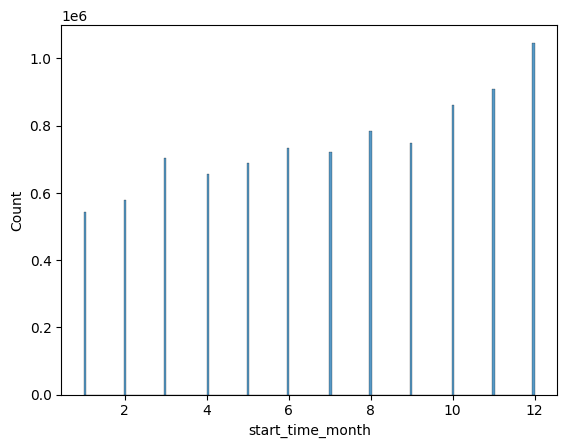

In [69]:
sns.histplot(df["start_time_month"])

In [70]:
#How many rides start per district
grouped = df[["start_time_month", "Trip_Minutes"]].groupby("start_time_month").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
start_time_month,
9,749200
8,782930
10,860663
11,908771
12,1046948


In [71]:
#How many rides start per district
grouped = df[["Pickup_Census_Tract", "start_time_month", "Trip_Minutes"]].groupby(["Pickup_Census_Tract", "start_time_month"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Pickup_Census_Tract start_time_month       
1.703184e+10        4                 65421
                    8                 67180
                    10                80476
                    11                81617
                    12                94886

In [72]:
#How many rides end per district
grouped = df[["Dropoff_Census_Tract", "start_time_month", "Trip_Minutes"]].groupby(["Dropoff_Census_Tract", "start_time_month"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Dropoff_Census_Tract start_time_month       
1.703184e+10         4                 59705
                     8                 62684
                     10                72750
                     11                72901
                     12                85985

In [73]:
#How many rides start-end combination 
grouped = df[["Pickup_C->Dropoff_C", "start_time_month", "Trip_Minutes"]].groupby(["Pickup_C->Dropoff_C", "start_time_month"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
Pickup_C->Dropoff_C start_time_month        
nan->nan            9                 215897
                    8                 224334
                    10                235517
                    11                248637
                    12                278739

## More features

### Points of Interest